## Crop Yield Estimation 
By Eng\ `Ahmed Mohie`

In [2]:
# loading libraries
import numpy as np # Linear algebra and numerical operations
import pandas as pd # data manipulation
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization

# loading libraries for data splitting and modeling
from sklearn.model_selection import train_test_split # Splitting data 
from sklearn.preprocessing import StandardScaler # Normalization and standarization 
from sklearn.linear_model import LinearRegression # linear model
from sklearn.metrics import r2_score, mean_squared_error # model testing

In [3]:
# loading and reading data
df = pd.read_csv('crop_yield.csv')
df.head(10)

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
0,West,Sandy,Cotton,897.077239,27.676966,False,True,Cloudy,122,6.555816
1,South,Clay,Rice,992.673282,18.026142,True,True,Rainy,140,8.527341
2,North,Loam,Barley,147.998025,29.794042,False,False,Sunny,106,1.127443
3,North,Sandy,Soybean,986.866331,16.644190,False,True,Rainy,146,6.517573
4,South,Silt,Wheat,730.379174,31.620687,True,True,Cloudy,110,7.248251
5,South,Silt,Soybean,797.471182,37.704974,False,True,Rainy,74,5.898416
6,West,Clay,Wheat,357.902357,31.593431,False,False,Rainy,90,2.652392
7,South,Sandy,Rice,441.131154,30.887107,True,True,Sunny,61,5.829542
8,North,Silt,Wheat,181.587861,26.752729,True,False,Sunny,127,2.943716
9,West,Sandy,Wheat,395.048968,17.646199,False,True,Rainy,140,3.707293


In [4]:
# exploring and describing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 10 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   Region                  1000000 non-null  object 
 1   Soil_Type               1000000 non-null  object 
 2   Crop                    1000000 non-null  object 
 3   Rainfall_mm             1000000 non-null  float64
 4   Temperature_Celsius     1000000 non-null  float64
 5   Fertilizer_Used         1000000 non-null  bool   
 6   Irrigation_Used         1000000 non-null  bool   
 7   Weather_Condition       1000000 non-null  object 
 8   Days_to_Harvest         1000000 non-null  int64  
 9   Yield_tons_per_hectare  1000000 non-null  float64
dtypes: bool(2), float64(3), int64(1), object(4)
memory usage: 62.9+ MB


In [5]:
df.describe()

,Rainfall_mm,Temperature_Celsius,Days_to_Harvest,Yield_tons_per_hectare
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,549.981901,27.504965,104.495025,4.649472
std,259.851320,7.220608,25.953412,1.696572
min,100.000896,15.000034,60.000000,-1.147613
25%,324.891090,21.254502,82.000000,3.417637
50%,550.124061,27.507365,104.000000,4.651808
75%,774.738520,33.753267,127.000000,5.879200
max,999.998098,39.999997,149.000000,9.963372


In [6]:
#checking null values
df.isna().sum()

Region                    0
Soil_Type                 0
Crop                      0
Rainfall_mm               0
Temperature_Celsius       0
Fertilizer_Used           0
Irrigation_Used           0
Weather_Condition         0
Days_to_Harvest           0
Yield_tons_per_hectare    0
dtype: int64

In [7]:
# checking duplicated values
df.duplicated().sum()

0

* No Null or Duplicated values

In [9]:
df.columns

Index(['Region', 'Soil_Type', 'Crop', 'Rainfall_mm', 'Temperature_Celsius',
       'Fertilizer_Used', 'Irrigation_Used', 'Weather_Condition',
       'Days_to_Harvest', 'Yield_tons_per_hectare'],
      dtype='object')

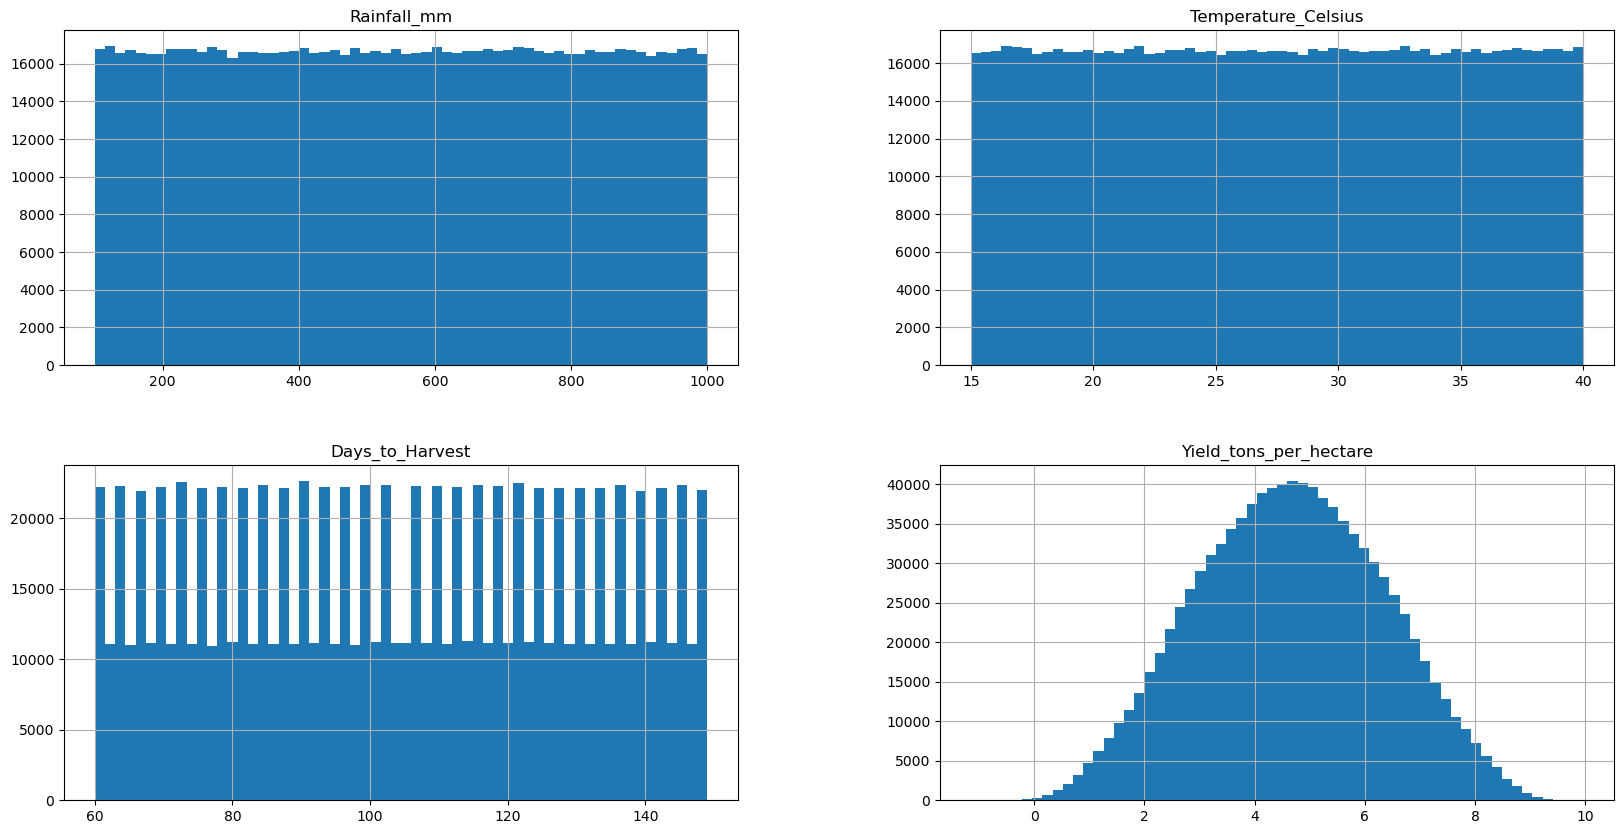

In [10]:
# feature understanding and desrtibution
df.hist(bins=60, figsize =(20,10))
plt.show()

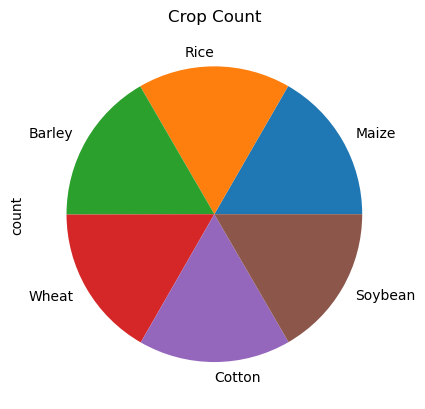

In [11]:
ax = df['Crop'].value_counts().plot(kind='pie', title='Crop Count')
plt.show()

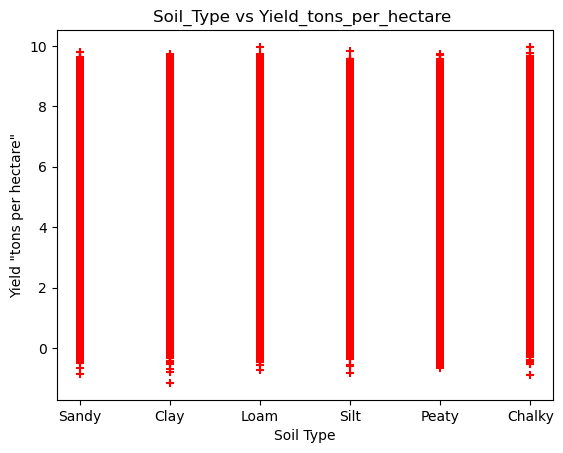

In [12]:
plt.scatter(df['Soil_Type'],df['Yield_tons_per_hectare'], marker = '+', color='r')
plt.title("Soil_Type vs Yield_tons_per_hectare " )
plt.xlabel('Soil Type')
plt.ylabel('Yield "tons per hectare"')
plt.show()

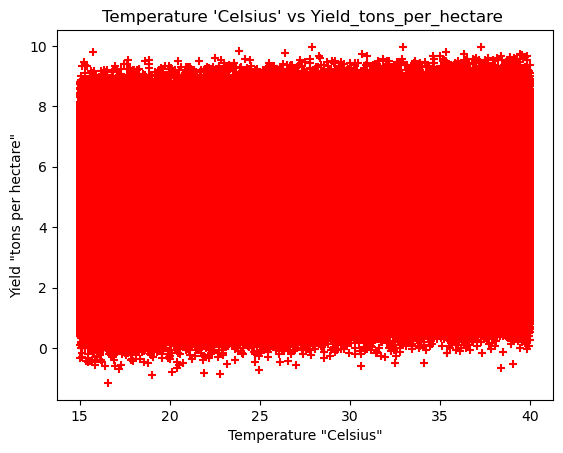

In [13]:
plt.scatter(df['Temperature_Celsius'],df['Yield_tons_per_hectare'], marker = '+', color='r')
plt.title("Temperature 'Celsius' vs Yield_tons_per_hectare " )
plt.xlabel('Temperature "Celsius"')
plt.ylabel('Yield "tons per hectare"')
plt.show()

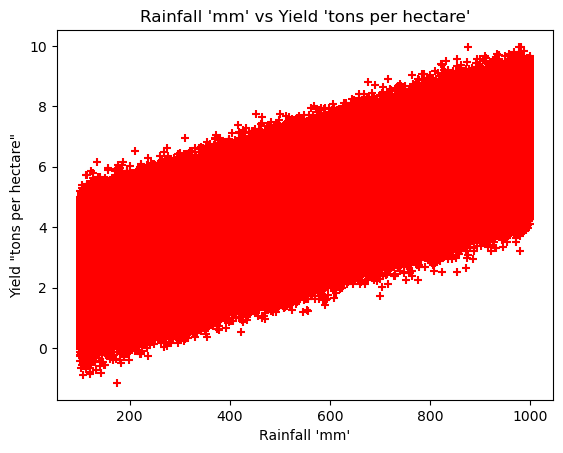

In [14]:
plt.scatter(df['Rainfall_mm'],df['Yield_tons_per_hectare'], marker = '+', color='r')
plt.title("Rainfall 'mm' vs Yield 'tons per hectare'" )
plt.xlabel("Rainfall 'mm'")
plt.ylabel('Yield "tons per hectare"')
plt.show()

In [15]:
# converting categorical values to numerical values
df = df.copy()
df['Region']= df['Region'].replace({'North' :1, 'South' : 0, "East" :2, 'West' :3} )
df['Soil_Type']= df['Soil_Type'].replace({'Sandy' :1, 'Clay' : 0, 'Loam' :2, 'Silt' :3, 'Peaty' :4, 'Chalky' :5} )
df['Crop']= df['Crop'].replace({'Cotton' :1, 'Rice' : 0, 'Barley' :2, 'Soybean': 3, 'Wheat' :4, 'Maize' :5} )
df['Fertilizer_Used']= df['Fertilizer_Used'].replace({'True' :1, 'False' : 0} )
df['Irrigation_Used']= df['Irrigation_Used'].replace({'True' :1, 'False' : 0} )
df['Weather_Condition']= df['Weather_Condition'].replace({'Sunny' :1, 'Rainy' : 0, 'Cloudy' :2} )

C:\Users\ALSABA ELECTRONICS\AppData\Local\Temp\ipykernel_7776\1157386928.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Region']= df['Region'].replace({'North' :1, 'South' : 0, "East" :2, 'West' :3} )
C:\Users\ALSABA ELECTRONICS\AppData\Local\Temp\ipykernel_7776\1157386928.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Soil_Type']= df['Soil_Type'].replace({'Sandy' :1, 'Clay' : 0, 'Loam' :2, 'Silt' :3, 'Peaty' :4, 'Chalky' :5} )
C:\Users\ALSABA ELECTRONICS\AppData\Local\Temp\ipykernel_7776\1157386928.py:5: FutureW

In [16]:
# defining features and target
x = df.drop('Yield_tons_per_hectare', axis = 1)
y = df['Yield_tons_per_hectare']

In [17]:
# normalizing data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[ 1.34168857e+00, -8.78326990e-01, -8.78076310e-01, ...,
         1.00101852e+00,  1.22628268e+00,  6.74477158e-01],
       [-1.34131832e+00, -1.46397514e+00, -1.46346130e+00, ...,
         1.00101852e+00, -1.22404798e+00,  1.36802793e+00],
       [-4.46982688e-01, -2.92678836e-01, -2.92691323e-01, ...,
        -9.98982518e-01,  1.11735078e-03,  5.79875870e-02],
       ...,
       [-4.46982688e-01,  8.78617472e-01, -8.78076310e-01, ...,
        -9.98982518e-01,  1.22628268e+00,  1.35048783e-01],
       [ 1.34168857e+00,  2.92969318e-01,  8.78078652e-01, ...,
        -9.98982518e-01,  1.11735078e-03, -9.61348057e-02],
       [ 1.34168857e+00, -8.78326990e-01,  1.46346364e+00, ...,
        -9.98982518e-01,  1.11735078e-03, -1.09793036e+00]])

In [18]:
# splitting data
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size= 0.3, random_state= 42)


In [19]:
# creating linear model
lin_model = LinearRegression()
lin_model

LinearRegression()

In [20]:
# fitting data
lin_model.fit(x_scaled, y)


LinearRegression()

In [21]:

y_pred = lin_model.predict(x_test)


In [22]:
mse = mean_squared_error(y_test, y_pred)
mse

0.25076082796663035

In [23]:
acc = r2_score(y_test, y_pred)

In [24]:
acc

0.9130957545195569